<a href="https://colab.research.google.com/github/ofoofoo/hot-neptune-collision/blob/main/Collision_Merge_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rebound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.6/293.6 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rebound: filename=rebound-3.23.2-cp38-cp38-linux_x86_64.whl size=818446 sha256=9ef9a318a30736fb01faf6b92c1e3f9db17756ebda5d2b28172b64182f603163
  Stored in directory: /root/.cache/pip/wheels/a0/84/02/74b0a2f88611e735d936bfe1e70a03dc2fef614542bfbf9bfa
Successfully built rebound


In [3]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
sys.tracebacklimit=0
from ast import literal_eval


# SET-UP
# Units: G = 1 Solar mass, AU, years/(2*pi)

G = 6.67408*10**(-11)   # gravitational constant 
Mearth = 5.9722*10**24  # kg
Rearth = 6.371*10**6  # meters
Msun = 1.98911*10**30 # kg
Rsun = 6.95*10**8 # meters
Mjup = 1.898*10**27  # kg
Rjup = 7.1492*10**7 # meters
year = 365.25*24*60*60  # years in seconds
AU = (G*Msun*(year**2)/(4.*np.pi**2))**(1./3.)  # meters
def perfect_merger(sim_pointer, collided_particles_index):
  orbitalelementslength["value"] -= 1
  orbitalelements = np.load("orbitalelements.npy")
  #print(type(orbitalelements))
  #print(literal_eval(orbitalelements))
  #print(type(literal_eval(orbitalelements)))
  sim = sim_pointer.contents
  ps = sim.particles
  print("Time: " + str(sim.t))
  i = collided_particles_index.p1   # p1 < p2 is not guaranteed.    
  j = collided_particles_index.p2 
  if i > j: # Swap
    temp = j
    j = i
    i = j
  for p in range(len(ps)):
      print("Particle " + str(p) + " mass: " + str(sim.particles[p].m))

  op = rebound.OrbitPlot(sim, color=True)
  #op1 = rebound.OrbitPlot(sim, xlim = [-1, 1], ylim = [-1, 1], color = True)
  print("Merging particle {} into {}".format(j, i))
  #print("Particle 1: x: " + str(ps[1].x) + " Particle 1: y: " + str(ps[1].y))
  #print("Particle 2: x: " + str(ps[2].x) + " Particle 2: y: " + str(ps[2].y))
  #op.ax.title("Merging particle {} into {}".format(j, i))
  op.ax.text(ps[i].x, ps[i].y, str(i))
  op.ax.text(ps[j].x, ps[j].y, str(j))
  #op1.ax.text(ps[i].x, ps[i].y, str(i))
  #op1.ax.text(ps[j].x, ps[j].y, str(j))

  # Merging 
  total_mass = ps[i].m + ps[j].m
  merged_planet = (ps[i] * ps[i].m + ps[j] * ps[j].m)/total_mass # conservation of momentum

  # merged radius assuming a uniform density
  merged_radius = (ps[i].r**3 + ps[j].r**3)**(1/3)

  ps[i] = merged_planet   # update p1's state vector (mass and radius will need corrections)
  ps[i].m = total_mass    # update to total mass
  ps[i].r = merged_radius # update to joined radius
  #orbitalelements = orbitalelements.tolist()
  np.delete(orbitalelements, j - 1) # remove the particle with index j from the orbital elements array
  #orbitalelementslength = orbitalelementslength - 1
  #print(orbitalelementslength)
  orbitalelements = np.array(orbitalelements) 
  np.save('orbitalelements', orbitalelements)

  sim.remove(j) # remove particle with index j from the simulation

  #return 3 # remove particle with index j



def setupSimulation(intmethod, tstepfrac, m_star, m_arr, a_arr, e_arr, r_arr, coplanarlim, inc_arr, omega_arr, meananomalyflag, Omega_arr, M_arr):
  sim = rebound.Simulation()
  sim.units = ('yr','AU','Msun')
  sim.integrator = intmethod # IAS15 is the default integrator
  sim.add(m=m_star)
  for i in range(len(m_arr)):
      sim.add(m = m_arr[i],
              a = a_arr[i],
              e = e_arr[i],
              M = M_arr[i],
              r = r_arr[i],
              omega = omega_arr[i],
              inc = inc_arr[i],
              Omega = Omega_arr[i])
  sim.move_to_com()
  return sim

Time: 0.006000000000000002
Particle 0 mass: 1.0
Particle 1 mass: 7.5061208279079595e-06
Particle 2 mass: 6.755508745117163e-06
Particle 3 mass: 7.5061208279079595e-06
Particle 4 mass: 2.2518362483723878e-05
Particle 5 mass: 1.5012241655815919e-05
Particle 6 mass: 0.00018014689986979102
Particle 7 mass: 0.00018014689986979102
Particle 8 mass: 0.00018014689986979102
Particle 9 mass: 0.00018014689986979102
Particle 10 mass: 0.00018014689986979102
Particle 11 mass: 0.00018014689986979102


Exception ignored on converting result of ctypes callback function: <function perfect_merger at 0x7f6c82a88670>
TypeError: an integer is required (got type NoneType)


Merging particle 2 into 1


Exception ignored on converting result of ctypes callback function: <function perfect_merger at 0x7f6c82a88670>
TypeError: an integer is required (got type NoneType)


Time: 97.61300000028406
Particle 0 mass: 1.0
Particle 1 mass: 1.4261629573025123e-05
Particle 2 mass: 7.5061208279079595e-06
Particle 3 mass: 2.2518362483723878e-05
Particle 4 mass: 1.5012241655815919e-05
Particle 5 mass: 0.00018014689986979102
Particle 6 mass: 0.00018014689986979102
Particle 7 mass: 0.00018014689986979102
Particle 8 mass: 0.00018014689986979102
Particle 9 mass: 0.00018014689986979102
Particle 10 mass: 0.00018014689986979102
Merging particle 10 into 5


Exception ignored on converting result of ctypes callback function: <function perfect_merger at 0x7f6c82a88670>
TypeError: an integer is required (got type NoneType)


Time: 139.76900000015084
Particle 0 mass: 1.0
Particle 1 mass: 1.4261629573025123e-05
Particle 2 mass: 7.5061208279079595e-06
Particle 3 mass: 2.2518362483723878e-05
Particle 4 mass: 1.5012241655815919e-05
Particle 5 mass: 0.00036029379973958204
Particle 6 mass: 0.00018014689986979102
Particle 7 mass: 0.00018014689986979102
Particle 8 mass: 0.00018014689986979102
Particle 9 mass: 0.00018014689986979102
Merging particle 9 into 6
Particle 0 mass: 1.0
Particle 1 mass: 1.4261629573025123e-05
Particle 2 mass: 7.5061208279079595e-06
Particle 3 mass: 2.2518362483723878e-05
Particle 4 mass: 1.5012241655815919e-05
Particle 5 mass: 0.00036029379973958204
Particle 6 mass: 0.00036029379973958204
Particle 7 mass: 0.00018014689986979102
Particle 8 mass: 0.00018014689986979102


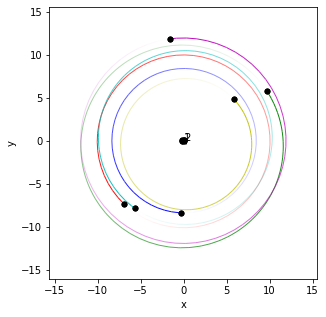

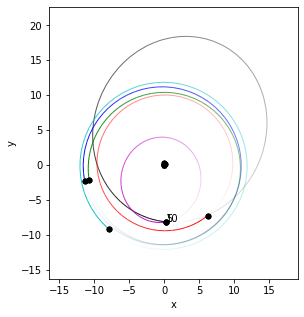

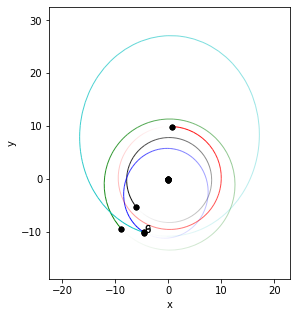

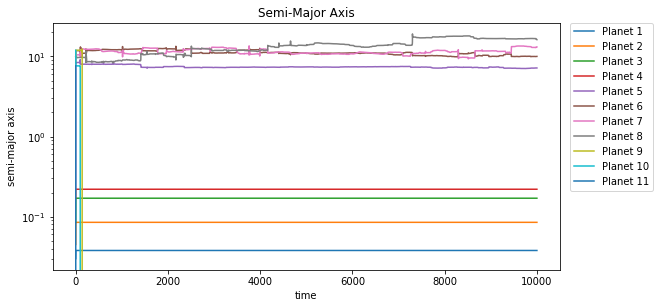

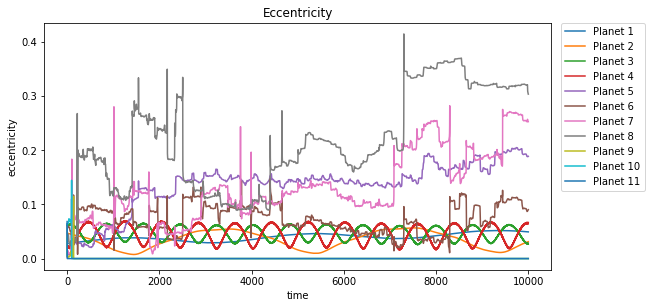

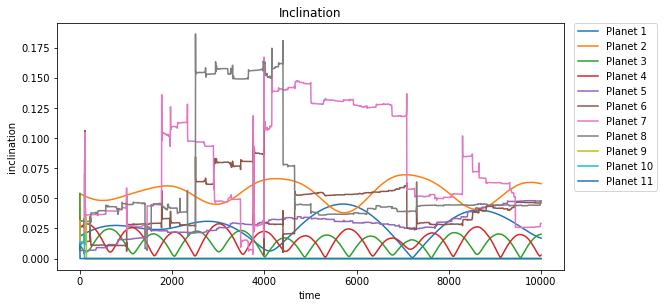

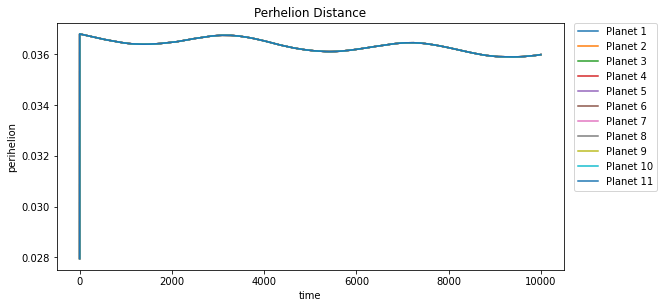

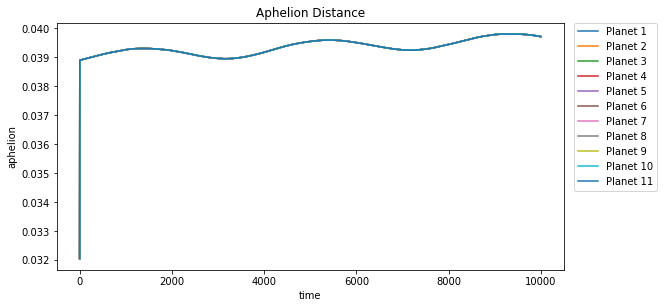

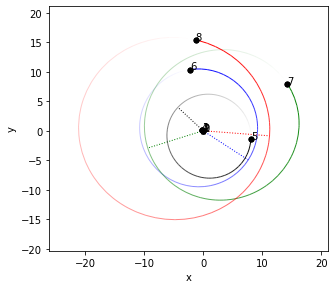

In [9]:
#------------------------------------------------COLLISION CASE-----------------------------------------------------------

%matplotlib inline
integrationtime = 10000
Noutputs = 10000
# sim = setupSimulation("whfast", # intmethod
#                        1/20, # tstepfrac
#                        0.78, # m_star
#                        [1*Mearth/Msun, 1*Mearth/Msun, 1*Mearth/Msun, 1*Mearth/Msun, 1*Mearth/Msun, 60*Mearth/Msun, 60*Mearth/Msun, 60*Mearth/Msun], # m_arr
#                        [0.35, 0.45, 0.8, 1.2, 4.5, random.uniform(4, 6), random.uniform(4, 6), random.uniform(4, 6)], # a_arr
#                        [np.random.rayleigh(scale = 0.035), np.random.rayleigh(scale = 0.035), np.random.rayleigh(scale = 0.035), np.random.rayleigh(scale = 0.035), np.random.rayleigh(scale = 0.035), random.uniform(0, 0.07), random.uniform(0, 0.07), random.uniform(0, 0.07)], # e_arr
#                        [0.5*Rearth/Rsun, 0.5*Rearth/Rsun, 0.5*Rearth/Rsun, 0.5*Rearth/Rsun, 0.5*Rearth/Rsun, 6.28812025*Rearth/Rsun, 6.28812025*Rearth/Rsun, 4*Rearth/Rsun], # r_arr
#                        False, # coplanarlim
#                        [np.random.rayleigh(scale = 0.0175), np.random.rayleigh(scale = 0.0175), np.random.rayleigh(scale = 0.0175), np.random.rayleigh(scale = 0.0175), np.random.rayleigh(scale = 0.0175), random.uniform(0, 0.035), random.uniform(0, 0.035), random.uniform(0, 0.035)], # inc_arr 
#                        [random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi)], # omega_arr
#                        True, # meananomalyflag
#                        [random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi)], # Omega_arr
#                        [random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi)])# M_arr
sim = setupSimulation("whfast", # intmethod
                       1/20, # tstepfrac
                       1, # m_star
                       [2.5*Mearth/Msun, 2.25*Mearth/Msun, 2.5*Mearth/Msun, 7.5*Mearth/Msun, 5*Mearth/Msun, 60*Mearth/Msun, 60*Mearth/Msun, 60*Mearth/Msun, 60*Mearth/Msun, 60*Mearth/Msun, 60*Mearth/Msun], # m_arr
                       [0.03, 0.045, 0.085, 0.17, 0.22, random.uniform(7, 13), random.uniform(7, 13), random.uniform(7, 13), random.uniform(7, 13), random.uniform(7, 13), random.uniform(7, 13)], # a_arr
                       [np.random.rayleigh(scale = 0.035), np.random.rayleigh(scale = 0.035), np.random.rayleigh(scale = 0.035), np.random.rayleigh(scale = 0.035), np.random.rayleigh(scale = 0.035), random.uniform(0, 0.07), random.uniform(0, 0.07), random.uniform(0, 0.07), random.uniform(0, 0.07), random.uniform(0, 0.07), random.uniform(0, 0.07)], # e_arr
                       [1*Rearth/Rsun, 0.75*Rearth/Rsun, 0.75*Rearth/Rsun, 1.75*Rearth/Rsun, 1.7*Rearth/Rsun, 1.5*Rearth/Rsun, 1.5*Rearth/Rsun, 1.5*Rearth/Rsun, 1.5*Rearth/Rsun, 1.5*Rearth/Rsun, 1.5*Rearth/Rsun], # r_arr
                       False, # coplanarlim
                       [np.random.rayleigh(scale = 0.0175), np.random.rayleigh(scale = 0.0175), np.random.rayleigh(scale = 0.0175), np.random.rayleigh(scale = 0.0175), np.random.rayleigh(scale = 0.0175), random.uniform(0, 0.035), random.uniform(0, 0.035), random.uniform(0, 0.035), random.uniform(0, 0.035), random.uniform(0, 0.035), random.uniform(0, 0.035)], # inc_arr 
                       [random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi)], # omega_arr
                       True, # meananomalyflag
                       [random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi)], # Omega_arr
                       [random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi)])# M_arr
sim.collision = "line"
ps = sim.particles

num_pl = len(sim.particles)
times = np.linspace(0, integrationtime, Noutputs)
orbitalelements = np.zeros((num_pl - 1, 7, Noutputs)) #number of parameters +1 because of output times
orbitalelementslength = num_pl - 1


sim.collision_resolve = perfect_merger # user defined collision resolution function`

# for p in range(len(ps)):
#         #print(i)
#         print("Particle " + str(p) + " mass: " + str(sim.particles[p].m))
orbitalelementslength = {"value":len(orbitalelements)}

# with open('orbitalelements.txt', 'w') as f:
#     f.write(str(orbitalelements))
# f.close()
np.save('orbitalelements', orbitalelements)
# print("Particles in the simulation at t=%6.1f: %d"%(sim.t,sim.N))
# print("System Mass: {}".format([p.m for p in sim.particles]))
for i,time in enumerate(times):
    orbitalelements = np.load("orbitalelements.npy")
    sim.integrate(time, exact_finish_time=0)
    orbits = sim.calculate_orbits()
    for a in range(orbitalelementslength['value']):
        orbitalelements[a][0][i] = time
        orbitalelements[a][1][i] = orbits[a].a
        orbitalelements[a][2][i] = orbits[a].e
        orbitalelements[a][3][i] = orbits[a].inc
        orbitalelements[a][4][i] = orbits[a].omega
        orbitalelements[a][5][i] = orbits[a].Omega
        orbitalelements[a][6][i] = orbits[a].M
    np.save('orbitalelements', orbitalelements)
  
#print("testtttttt")
#print(len(orbitalelements))
#print("mass of orbitalelemetns index:")
#print(orbitalelements)
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(221)
ax.set_xlabel("time")
ax.set_ylabel("semi-major axis")
ax.set_title("Semi-Major Axis")
ax.set_yscale("log")
plt.plot(times, orbitalelements[0][1], label = "Planet 1");
plt.plot(times, orbitalelements[1][1], label = "Planet 2");
plt.plot(times, orbitalelements[2][1], label = "Planet 3");
plt.plot(times, orbitalelements[3][1], label = "Planet 4");
plt.plot(times, orbitalelements[4][1], label = "Planet 5");
plt.plot(times, orbitalelements[5][1], label = "Planet 6");
plt.plot(times, orbitalelements[6][1], label = "Planet 7");
plt.plot(times, orbitalelements[7][1], label = "Planet 8");
plt.plot(times, orbitalelements[8][1], label = "Planet 9");
plt.plot(times, orbitalelements[9][1], label = "Planet 10");
plt.plot(times, orbitalelements[10][1], label = "Planet 11");

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(221)
ax.set_xlabel("time")
ax.set_ylabel("eccentricity")
ax.set_title("Eccentricity")
plt.plot(times, orbitalelements[0][2], label = "Planet 1");
plt.plot(times, orbitalelements[1][2], label = "Planet 2");
plt.plot(times, orbitalelements[2][2], label = "Planet 3");
plt.plot(times, orbitalelements[3][2], label = "Planet 4");
plt.plot(times, orbitalelements[4][2], label = "Planet 5");
plt.plot(times, orbitalelements[5][2], label = "Planet 6");
plt.plot(times, orbitalelements[6][2], label = "Planet 7");
plt.plot(times, orbitalelements[7][2], label = "Planet 8");
plt.plot(times, orbitalelements[8][2], label = "Planet 9");
plt.plot(times, orbitalelements[9][2], label = "Planet 10");
plt.plot(times, orbitalelements[10][2], label = "Planet 11");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(221)
ax.set_xlabel("time")
ax.set_ylabel("inclination")
ax.set_title("Inclination")
plt.plot(times, orbitalelements[0][3], label = "Planet 1");
plt.plot(times, orbitalelements[1][3], label = "Planet 2");
plt.plot(times, orbitalelements[2][3], label = "Planet 3");
plt.plot(times, orbitalelements[3][3], label = "Planet 4");
plt.plot(times, orbitalelements[4][3], label = "Planet 5");
plt.plot(times, orbitalelements[5][3], label = "Planet 6");
plt.plot(times, orbitalelements[6][3], label = "Planet 7");
plt.plot(times, orbitalelements[7][3], label = "Planet 8");
plt.plot(times, orbitalelements[8][3], label = "Planet 9");
plt.plot(times, orbitalelements[9][3], label = "Planet 10");
plt.plot(times, orbitalelements[10][3], label = "Planet 11");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(221)
ax.set_xlabel("time")
ax.set_ylabel("perihelion")
ax.set_title("Perhelion Distance")
plt.plot(times, orbitalelements[0][1] * (1-orbitalelements[0][2]), label = "Planet 1");
plt.plot(times, orbitalelements[0][1] * (1-orbitalelements[0][2]), label = "Planet 2");
plt.plot(times, orbitalelements[0][1] * (1-orbitalelements[0][2]), label = "Planet 3");
plt.plot(times, orbitalelements[0][1] * (1-orbitalelements[0][2]), label = "Planet 4");
plt.plot(times, orbitalelements[0][1] * (1-orbitalelements[0][2]), label = "Planet 5");
plt.plot(times, orbitalelements[0][1] * (1-orbitalelements[0][2]), label = "Planet 6");
plt.plot(times, orbitalelements[0][1] * (1-orbitalelements[0][2]), label = "Planet 7");
plt.plot(times, orbitalelements[0][1] * (1-orbitalelements[0][2]), label = "Planet 8");
plt.plot(times, orbitalelements[0][1] * (1-orbitalelements[0][2]), label = "Planet 9");
plt.plot(times, orbitalelements[0][1] * (1-orbitalelements[0][2]), label = "Planet 10");
plt.plot(times, orbitalelements[0][1] * (1-orbitalelements[0][2]), label = "Planet 11");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(221)
ax.set_xlabel("time")
ax.set_ylabel("aphelion")
ax.set_title("Aphelion Distance")
plt.plot(times, orbitalelements[0][1] * (1+orbitalelements[0][2]), label = "Planet 1");
plt.plot(times, orbitalelements[0][1] * (1+orbitalelements[0][2]), label = "Planet 2");
plt.plot(times, orbitalelements[0][1] * (1+orbitalelements[0][2]), label = "Planet 3");
plt.plot(times, orbitalelements[0][1] * (1+orbitalelements[0][2]), label = "Planet 4");
plt.plot(times, orbitalelements[0][1] * (1+orbitalelements[0][2]), label = "Planet 5");
plt.plot(times, orbitalelements[0][1] * (1+orbitalelements[0][2]), label = "Planet 6");
plt.plot(times, orbitalelements[0][1] * (1+orbitalelements[0][2]), label = "Planet 7");
plt.plot(times, orbitalelements[0][1] * (1+orbitalelements[0][2]), label = "Planet 8");
plt.plot(times, orbitalelements[0][1] * (1+orbitalelements[0][2]), label = "Planet 9");
plt.plot(times, orbitalelements[0][1] * (1+orbitalelements[0][2]), label = "Planet 10");
plt.plot(times, orbitalelements[0][1] * (1+orbitalelements[0][2]), label = "Planet 11");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# ax = plt.subplot(222)
# ax.set_xlabel("time")
# ax.set_ylabel("semi-major")
# ax.set_title("sma of planet 2")

# plt.plot(times, orbitalelements[1][1]);

# ax = plt.subplot(223)
# ax.set_xlabel("time")
# ax.set_ylabel("semi-major axis")
# ax.set_title("sma of planet 3")

# plt.plot(times, orbitalelements[2][1]);

# ax = plt.subplot(224)
# ax.set_xlabel("time")
# ax.set_ylabel("eccentricity")
# ax.set_title("sma of planet 4")

# plt.plot(times, orbitalelements[3][1]);

# fig = plt.figure(figsize=(15,5))
# ax = plt.subplot(221)
# ax.set_xlabel("time")
# ax.set_ylabel("semi-major axis")
# ax.set_title("sma of planet 5")

# plt.plot(times, orbitalelements[4][1]);

# ax = plt.subplot(222)
# ax.set_xlabel("time")
# ax.set_ylabel("eccentricity")
# ax.set_title("sma of planet 6")

# plt.plot(times, orbitalelements[5][1]);

# ax = plt.subplot(223)
# ax.set_xlabel("time")
# ax.set_ylabel("semi-major axis")
# ax.set_title("sma of planet 7")
# plt.plot(times, orbitalelements[6][1]);

# ax = plt.subplot(224)
# ax.set_xlabel("time")
# ax.set_ylabel("semi-major axis")
# ax.set_title("sma of planet 8")
# plt.plot(times, orbitalelements[7][1]);

for p in range(len(ps)):
        #print(i)
        print("Particle " + str(p) + " mass: " + str(sim.particles[p].m))
op = rebound.OrbitPlot(sim, periastron=True, color=True)
for p in range(len(ps)):
  op.ax.text(ps[p].x, ps[p].y, str(p))
#op1 = rebound.OrbitPlot(sim, xlim = [-1, 1], ylim = [-1, 1], color=True)

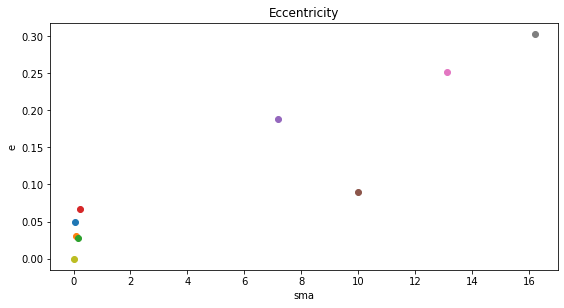

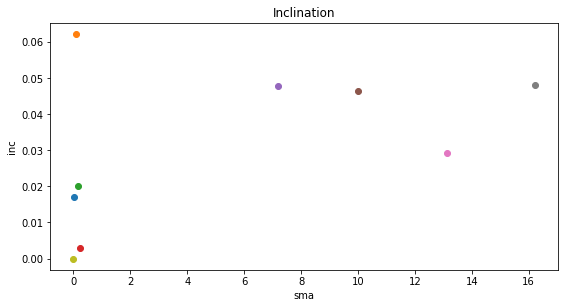

In [11]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(221)
ax.set_xlabel("sma")
ax.set_ylabel("e")
ax.set_title("Eccentricity")
for k in range(orbitalelementslength['value'] + 1):
  plt.scatter(orbitalelements[k][1][-1], orbitalelements[k][2][-1], label = "Planet 1");
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(221)
ax.set_xlabel("sma")
ax.set_ylabel("inc")
ax.set_title("Inclination")
for k in range(orbitalelementslength['value'] + 1):
  plt.scatter(orbitalelements[k][1][-1], orbitalelements[k][3][-1], label = "Planet 1");


Particle 0 mass: 0.78
Particle 1 mass: 3.0024483311631838e-06
Particle 2 mass: 3.0024483311631838e-06
Particle 3 mass: 3.0024483311631838e-06
Particle 4 mass: 3.0024483311631838e-06
Particle 5 mass: 3.0024483311631838e-06
Particle 6 mass: 0.00018014689986979102
Particle 7 mass: 0.00018014689986979102
Particle 8 mass: 0.00018014689986979102


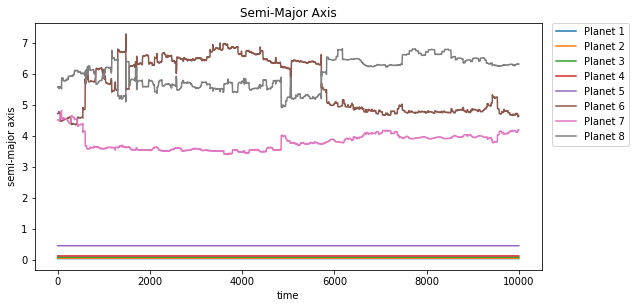

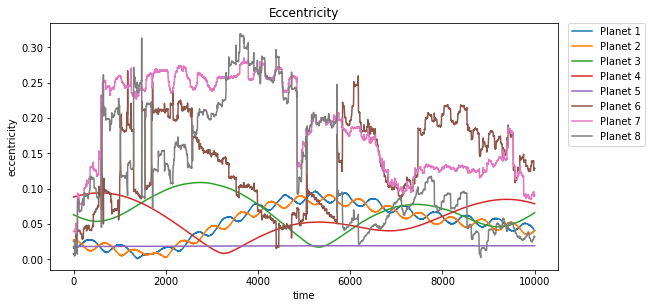

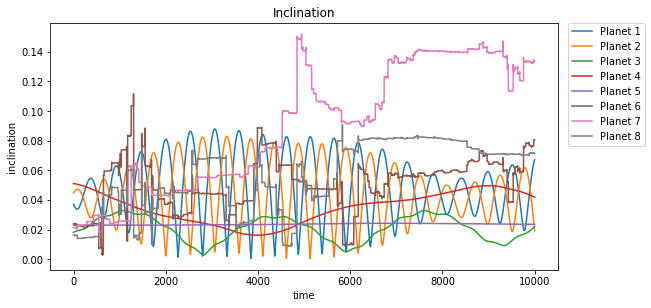

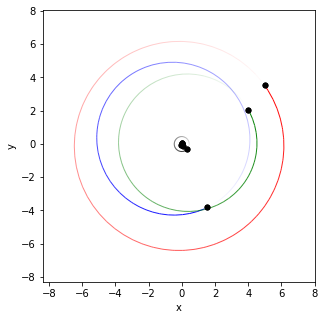

In [ ]:
#------------------------------------------------COLLISIONLESS CASE-----------------------------------------------------------

%matplotlib inline
integrationtime = 10000
Noutputs = 5000
sim = setupSimulation("whfast", # intmethod
                       1/20, # tstepfrac
                       0.78, # m_star
                       [1*Mearth/Msun, 1*Mearth/Msun, 1*Mearth/Msun, 1*Mearth/Msun, 1*Mearth/Msun, 60*Mearth/Msun, 60*Mearth/Msun, 60*Mearth/Msun], # m_arr
                       [0.035, 0.045, 0.08, 0.12, 0.45, random.uniform(4, 6), random.uniform(4, 6), random.uniform(4, 6)], # a_arr
                       [np.random.rayleigh(scale = 0.035), np.random.rayleigh(scale = 0.035), np.random.rayleigh(scale = 0.035), np.random.rayleigh(scale = 0.035), np.random.rayleigh(scale = 0.035), random.uniform(0, 0.07), random.uniform(0, 0.07), random.uniform(0, 0.07)], # e_arr
                       [0.5*Rearth/Rsun, 0.5*Rearth/Rsun, 0.5*Rearth/Rsun, 0.5*Rearth/Rsun, 0.5*Rearth/Rsun, 6.28812025*Rearth/Rsun, 6.28812025*Rearth/Rsun, 4*Rearth/Rsun], # r_arr
                       False, # coplanarlim
                       [np.random.rayleigh(scale = 0.0175), np.random.rayleigh(scale = 0.0175), np.random.rayleigh(scale = 0.0175), np.random.rayleigh(scale = 0.0175), np.random.rayleigh(scale = 0.0175), random.uniform(0, 0.035), random.uniform(0, 0.035), random.uniform(0, 0.035)], # inc_arr 
                       [random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi)], # omega_arr
                       True, # meananomalyflag
                       [random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi)], # Omega_arr
                       [random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi), random.uniform(0, 2 * np.pi)])# M_arr
ps = sim.particles
num_pl = len(sim.particles)
times = np.linspace(0, integrationtime, Noutputs)
orbitalelements = np.zeros((num_pl, 7, Noutputs)) #number of parameters +1 because of output times
for i,time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    orbits = sim.calculate_orbits()
    for a in range(num_pl - 1):
        orbitalelements[a][1][i] = orbits[a].a
        orbitalelements[a][2][i] = orbits[a].e
        orbitalelements[a][3][i] = orbits[a].inc
        orbitalelements[a][4][i] = orbits[a].omega
        orbitalelements[a][5][i] = orbits[a].Omega
        orbitalelements[a][6][i] = orbits[a].M
        
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(221)
ax.set_xlabel("time")
ax.set_ylabel("semi-major axis")
ax.set_title("Semi-Major Axis")
plt.plot(times, orbitalelements[0][1], label = "Planet 1");
plt.plot(times, orbitalelements[1][1], label = "Planet 2");
plt.plot(times, orbitalelements[2][1], label = "Planet 3");
plt.plot(times, orbitalelements[3][1], label = "Planet 4");
plt.plot(times, orbitalelements[4][1], label = "Planet 5");
plt.plot(times, orbitalelements[5][1], label = "Planet 6");
plt.plot(times, orbitalelements[6][1], label = "Planet 7");
plt.plot(times, orbitalelements[7][1], label = "Planet 8");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(221)
ax.set_xlabel("time")
ax.set_ylabel("eccentricity")
ax.set_title("Eccentricity")
plt.plot(times, orbitalelements[0][2], label = "Planet 1");
plt.plot(times, orbitalelements[1][2], label = "Planet 2");
plt.plot(times, orbitalelements[2][2], label = "Planet 3");
plt.plot(times, orbitalelements[3][2], label = "Planet 4");
plt.plot(times, orbitalelements[4][2], label = "Planet 5");
plt.plot(times, orbitalelements[5][2], label = "Planet 6");
plt.plot(times, orbitalelements[6][2], label = "Planet 7");
plt.plot(times, orbitalelements[7][2], label = "Planet 8");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(221)
ax.set_xlabel("time")
ax.set_ylabel("inclination")
ax.set_title("Inclination")
plt.plot(times, orbitalelements[0][3], label = "Planet 1");
plt.plot(times, orbitalelements[1][3], label = "Planet 2");
plt.plot(times, orbitalelements[2][3], label = "Planet 3");
plt.plot(times, orbitalelements[3][3], label = "Planet 4");
plt.plot(times, orbitalelements[4][3], label = "Planet 5");
plt.plot(times, orbitalelements[5][3], label = "Planet 6");
plt.plot(times, orbitalelements[6][3], label = "Planet 7");
plt.plot(times, orbitalelements[7][3], label = "Planet 8");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# fig = plt.figure(figsize=(15,5))

# ax = plt.subplot(221)
# ax.set_xlabel("time")
# ax.set_ylabel("semi-major axis")
# plt.plot(times, orbitalelements[0][1]);

# ax = plt.subplot(222)
# ax.set_xlabel("time")
# ax.set_ylabel("eccentricity")
# plt.plot(times, orbitalelements[0][2]);

# ax = plt.subplot(223)
# ax.set_xlabel("time")
# ax.set_ylabel("semi-major axis")
# plt.plot(times, orbitalelements[7][1]);

# ax = plt.subplot(224)
# ax.set_xlabel("time")
# ax.set_ylabel("eccentricity")
# plt.plot(times, orbitalelements[7][2]);

for i in range(len(ps)):
        #print(i)
        print("Particle " + str(i) + " mass: " + str(sim.particles[i].m))
op = rebound.OrbitPlot(sim, color=True)
